In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from nltk.tokenize import word_tokenize

In [3]:
df = pd.read_csv('./combined_dataset_lematized.csv')

In [4]:
df.head()

,title,text,subject,date,label
0,allowing nuclear weapon japan could defuse nor...,tokyo reuters japan look quick resolute respon...,worldnews,"September 6, 2017",true
1,mccain illness deprives senate crucial vote tr...,washington reuters john mccains illness requir...,politicsNews,"July 20, 2017",fake
2,trump nominate excongressman green lead u aid ...,washington reuters president donald trump nomi...,politicsNews,"May 10, 2017",true
3,syria call un security council condemn israeli...,beirut reuters syria foreign ministry thursday...,worldnews,"November 2, 2017",true
4,trump weighed son russia attorney statement wh...,washington reuters white house said tuesday u ...,politicsNews,"August 1, 2017",fake


In [5]:
df = df.drop(columns=['date'])

In [6]:
df['text_length'] = df['text'].apply(lambda x: len(word_tokenize(x)))

In [7]:
df['title_length'] = df['title'].apply(lambda x: len(word_tokenize(x)))

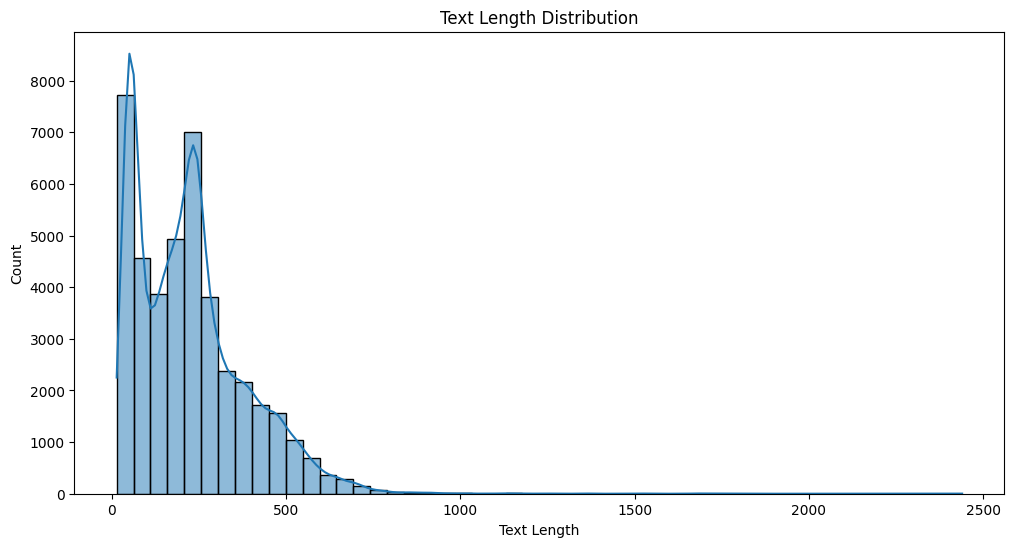

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


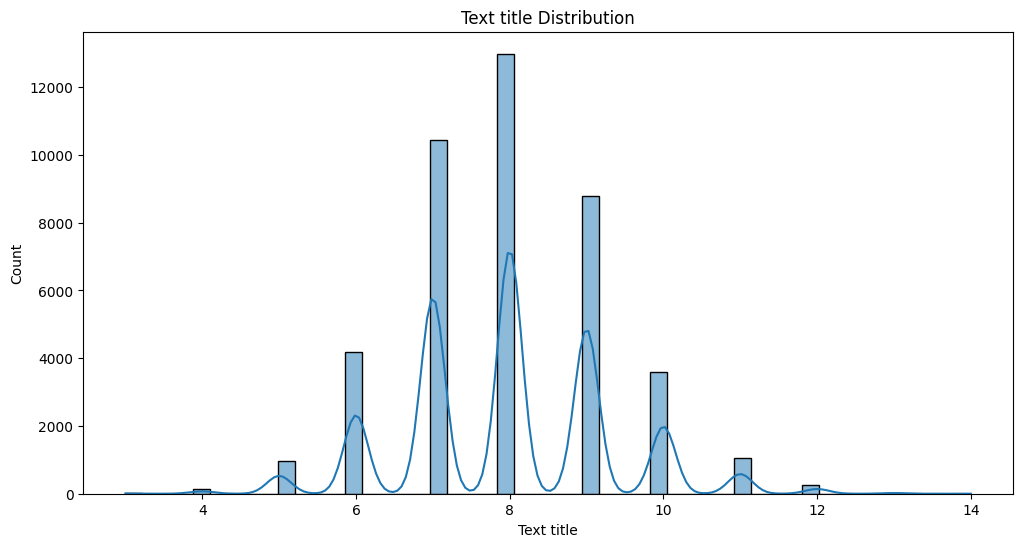

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['title_length'], bins=50, kde=True)
plt.title('Text title Distribution')
plt.xlabel('Text title')
plt.ylabel('Count')
plt.show()


In [10]:
from collections import Counter


In [23]:
word_counts = Counter(" ".join(df['text']).split()).most_common(20)

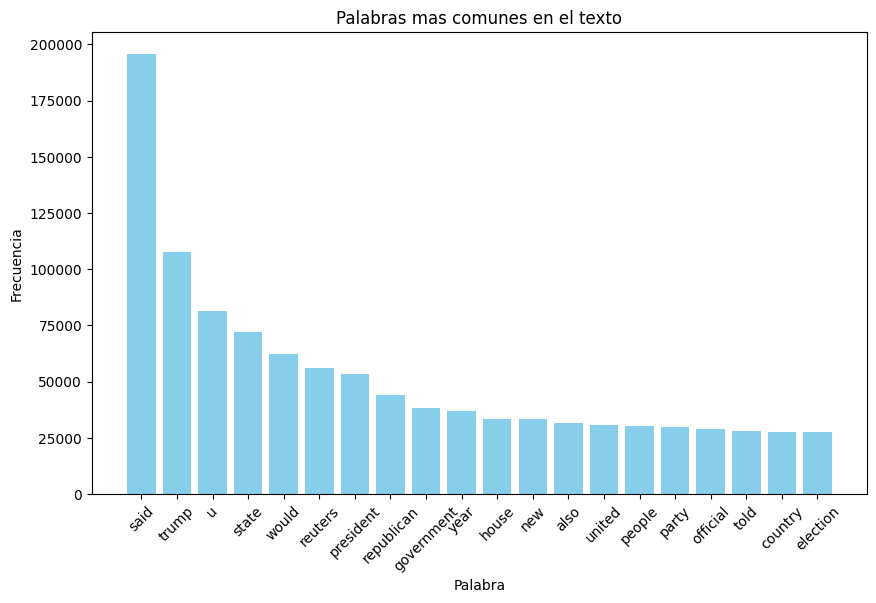

In [24]:
plt.figure(figsize=(10, 6))
words, counts = zip(*word_counts)
plt.bar(words, counts, color='skyblue')
plt.title('Palabras mas comunes en el texto')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [25]:
word_counts = Counter(" ".join(df['title']).split()).most_common(20)

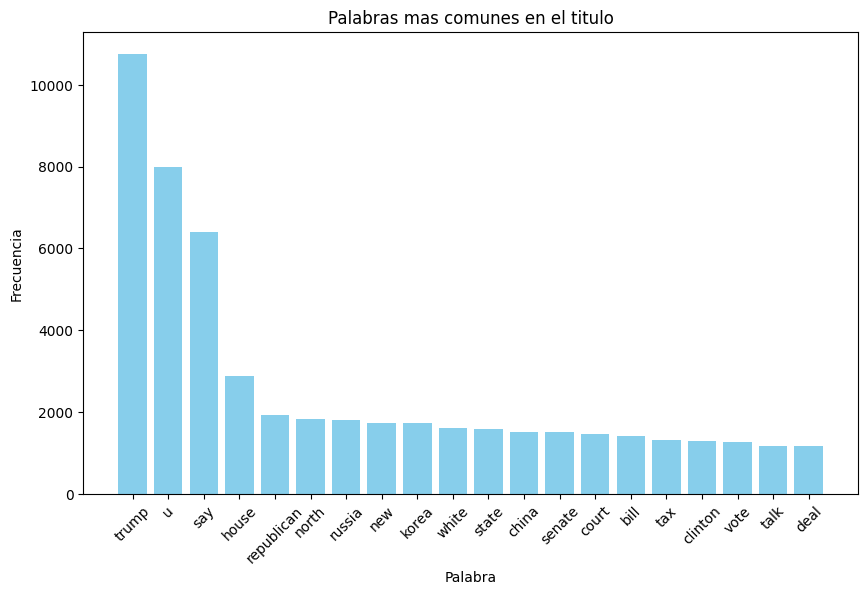

In [26]:
plt.figure(figsize=(10, 6))
words, counts = zip(*word_counts)
plt.bar(words, counts, color='skyblue')
plt.title('Palabras mas comunes en el titulo')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [15]:
from nltk.util import ngrams

In [16]:
def get_top_ngrams(text, n, top_n=10):
    tokens = text.split()
    n_grams = ngrams(tokens, n)
    ngram_freq = Counter(n_grams)
    top_ngrams = ngram_freq.most_common(top_n)
    return top_ngrams

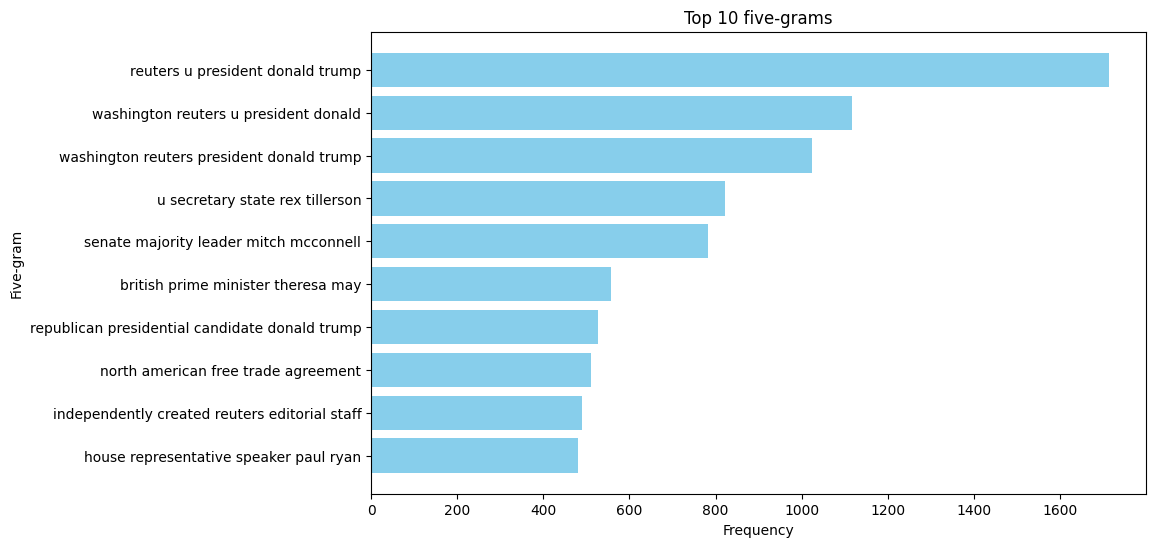

In [29]:
combined_text = ' '.join(df['text'])

top_bigrams = get_top_ngrams(combined_text, n=5, top_n=10)

bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))


plt.figure(figsize=(10, 6))
plt.barh(bigram_df['Bigram'], bigram_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Five-gram')
plt.title('Top 10 five-grams')
plt.gca().invert_yaxis()  
plt.show()

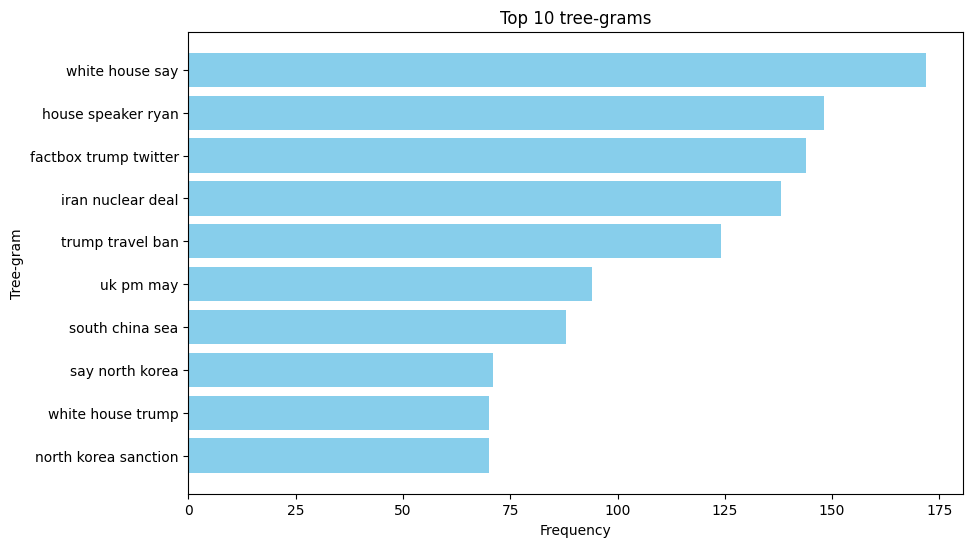

In [30]:
combined_text = ' '.join(df['title'])

top_bigrams = get_top_ngrams(combined_text, n=3, top_n=10)

bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))


plt.figure(figsize=(10, 6))
plt.barh(bigram_df['Bigram'], bigram_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Tree-gram')
plt.title('Top 10 tree-grams')
plt.gca().invert_yaxis()  
plt.show()

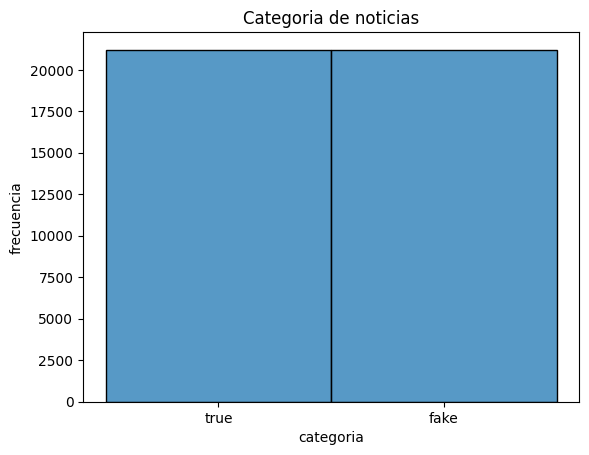

In [21]:
sns.histplot(df['label'],)
plt.title('Categoria de noticias')
plt.xlabel('categoria')
plt.ylabel('frecuencia')
plt.show()

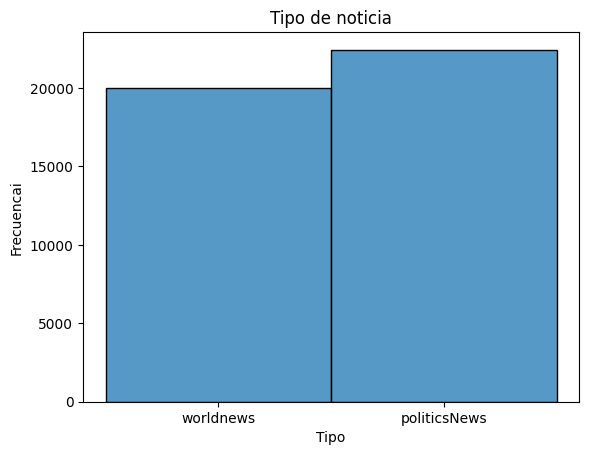

In [22]:
sns.histplot(df['subject'])
plt.title('Tipo de noticia')
plt.xlabel('Tipo')
plt.ylabel('Frecuencai')
plt.show()